# 9. NLP (Natural Language Processing)
Обработка естественного языка

Запускать в колабе лучше

__Requirements:__  `pip install --upgrade nltk gensim bokeh` , but only if you're running locally.

In [89]:
import numpy as np
import pandas as pd

from IPython.display import Image 
from matplotlib import pyplot as plt


In [2]:
import nltk #natural language tool kit
nltk.download('punkt') #дополнительная подзагрузка знаков препинания
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/samstikhin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/samstikhin/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [24]:
!pip install -q pymorphy2

In [ ]:
!pip install spacy
!python -m spacy download en

# Эмбеддинги (Embeddings)

Представление текстового (на самом деле любого) объекта в виде вектора

# 1. Предобработка текста

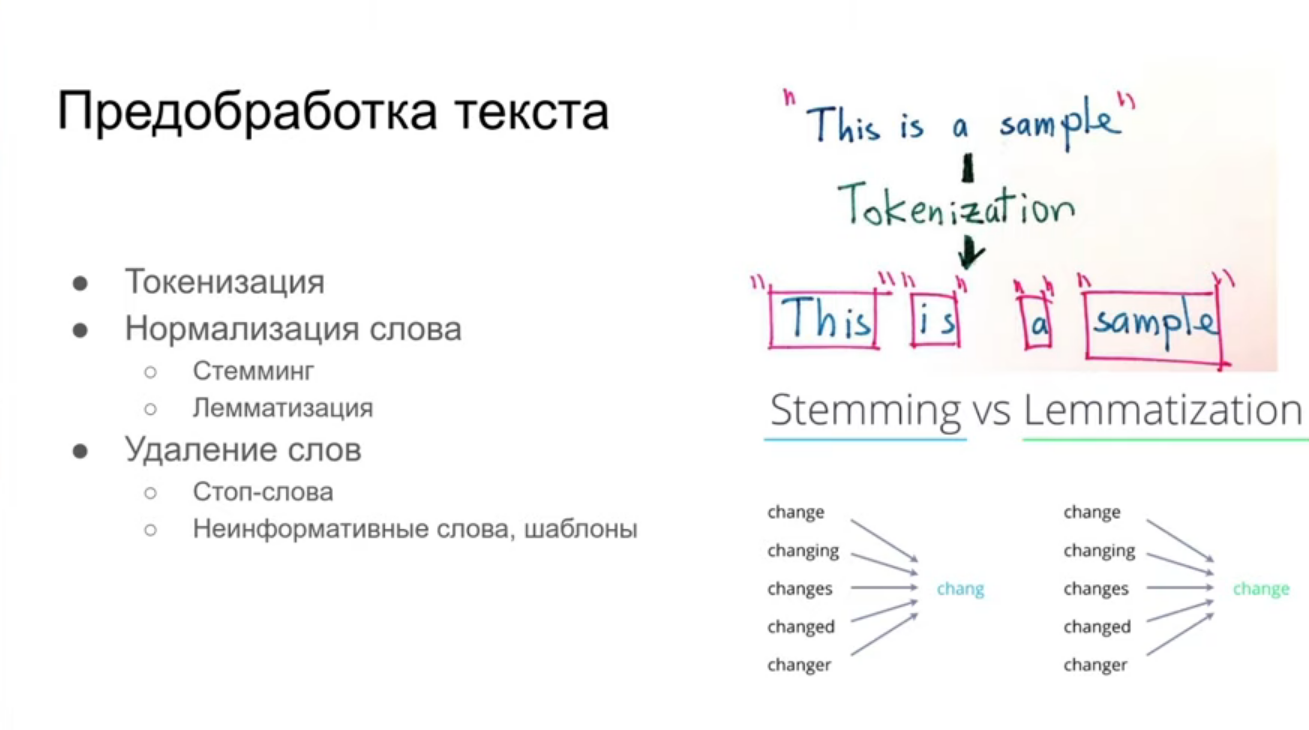

In [3]:
Image('images/preprocess.png', width=700)

## 1.1 Токенизация

In [90]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [91]:
# токенизация по словам
data = "All work and no play makes jack a dull boy, all work and no play"
tokens = word_tokenize(data.lower())
print(tokens)

data = "К сожалению, В чат фиита нельзя кидать стикеры"
tokens = word_tokenize(data.lower())
print(tokens)

['all', 'work', 'and', 'no', 'play', 'makes', 'jack', 'a', 'dull', 'boy', ',', 'all', 'work', 'and', 'no', 'play']
['к', 'сожалению', ',', 'в', 'чат', 'фиита', 'нельзя', 'кидать', 'стикеры']


In [92]:
# токенизация по предложениям
print(sent_tokenize("I was going home when she rung. It was a surprise."))
print(sent_tokenize("Решайте дз вовремя. Не откладывайте, не надейтесь на лучшее."))


['I was going home when she rung.', 'It was a surprise.']
['Решайте дз вовремя.', 'Не откладывайте, не надейтесь на лучшее.']


## 1.2 Нормализация слова
* ‘Caring’ -> Лемматизация -> ‘Care’
* ‘Caring’ -> Стемминг -> ‘Car’

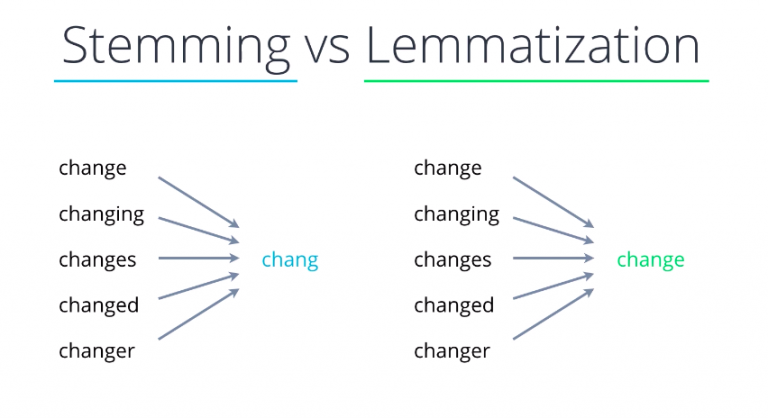

In [7]:
Image('images/lemmatization.png', width=500)

### Стемминг
* процесс нахождения основы слова для заданного исходного слова

In [100]:
from nltk.stem import PorterStemmer, SnowballStemmer # Портер - самый первый алгоритм стемминга, Сноубол - прокаченная версия первого для нескольких языков
words = ["game", "gaming", "gamed", "games", "compacted"]
words_ru = ['корова', 'мальчики', 'мужчины', 'столом', 'убежала', 'тиктокнуть']
words_de = ['ich', 'lieben', 'arbeiten']

In [9]:
ps = SnowballStemmer(language='english')
list(map(ps.stem, words))

['game', 'game', 'game', 'game', 'compact']

In [95]:
ss = SnowballStemmer(language='russian')
list(map(ss.stem, words_ru))

['коров', 'мальчик', 'мужчин', 'стол', 'убежа', 'тиктокнут']

In [101]:
ss = SnowballStemmer(language='german')
list(map(ss.stem, words_de))

['ich', 'lieb', 'arbeit']

* [Википедия](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%B5%D0%BC%D0%BC%D0%B5%D1%80_%D0%9F%D0%BE%D1%80%D1%82%D0%B5%D1%80%D0%B0)
* [Как работает русский стеммер](http://snowball.tartarus.org/algorithms/russian/stemmer.html)

### Лематизация
* процесс приведения словоформы к лемме — её нормальной (словарной) форме

In [105]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government.  Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony."""

raw_ru = """Не существует научных доказательств в пользу эффективности НЛП оно 
признано псевдонаукой. Систематические обзоры указывают что НЛП основано на 
устаревших представлениях об устройстве мозга, несовместимо с современной 
неврологией и содержит ряд фактических ошибок"""

#### NLTK

In [103]:
text = "studies studying cries cry"
tokenization = nltk.word_tokenize(text)
print(' '.join([wordnet_lemmatizer.lemmatize(token) for token in tokenization]))

study studying cry cry


In [12]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
text = "studies studying cries cry"
tokenization = nltk.word_tokenize(raw)
print(' '.join([wordnet_lemmatizer.lemmatize(token) for token in tokenization]))

DENNIS : Listen , strange woman lying in pond distributing sword is no basis for a system of government . Supreme executive power derives from a mandate from the mass , not from some farcical aquatic ceremony .


#### Pymorphy2

In [106]:
import pymorphy2 #чисто для русского языка
morph = pymorphy2.MorphAnalyzer()
pymorphy_results = list(map(lambda x: morph.parse(x), raw_ru.split(' ')))
print(' '.join([res[0].normal_form for res in pymorphy_results]))

не существовать научный доказательство в польза эффективность нлп оно 
признать псевдонаукой. систематический обзор указывать что нлп основать на 
устаревший представление о устройство мозга, несовместимый с современный 
неврология и содержать ряд фактический ошибка


#### Есть еще spacy, это как nltk только круче и быстрее

In [18]:
import spacy #для всех языков
nlp = spacy.load("en_core_web_sm")
spacy_results = nlp(raw)
print(' '.join([token.lemma_ for token in spacy_results]))

dennis : listen , strange woman lie in pond distribute sword 
 be no basis for a system of government .   Supreme executive power derive from 
 a mandate from the masse , not from some farcical aquatic ceremony .


### Морфологическая информация

In [19]:
[(res[0].normal_form, res[0].tag) for res in pymorphy_results[:9]]

[('не', OpencorporaTag('PRCL')),
 ('существовать', OpencorporaTag('VERB,impf,intr sing,3per,pres,indc')),
 ('научный', OpencorporaTag('ADJF,Qual plur,gent')),
 ('доказательство', OpencorporaTag('NOUN,inan,neut plur,gent')),
 ('в', OpencorporaTag('PREP')),
 ('польза', OpencorporaTag('NOUN,inan,femn sing,accs')),
 ('эффективность', OpencorporaTag('NOUN,inan,femn sing,gent')),
 ('нлп,', OpencorporaTag('UNKN')),
 ('оно', OpencorporaTag('NPRO,neut,3per,Anph sing,nomn'))]

In [20]:
[(token.lemma_, token.pos_) for token in spacy_results[:7]]

[('dennis', 'NOUN'),
 (':', 'PUNCT'),
 ('listen', 'VERB'),
 (',', 'PUNCT'),
 ('strange', 'ADJ'),
 ('woman', 'NOUN'),
 ('lie', 'VERB')]

### Named entities recognition (NER)

In [110]:
doc = nlp('I am ')

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

In [21]:
doc = nlp('Apple is looking at buying U.K. startup for $1 billion')

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


* [pymorpy2](https://pymorphy2.readthedocs.io/en/stable/)
* [spacy](https://habr.com/ru/post/504680/)

## 1.3 Удаление слов

### Стоп-слова

In [22]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/samstikhin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
stopWords = set(stopwords.words('english'))
print(stopWords)

{'was', 'were', 'weren', 'of', "should've", 'itself', "hadn't", "you're", 'most', 'through', 'or', 'own', 'their', 'those', 'then', 'to', 'didn', 'myself', 'at', 'what', 'down', 'other', 'it', 'been', 'both', 'having', 'his', 'here', 'are', "shan't", 'after', 'yourselves', 'herself', 'against', 'wouldn', 'needn', 'doesn', 'ourselves', 'yourself', 'for', 'll', "won't", 'this', 'had', 'there', 'shan', 'himself', 'few', 'its', 'between', "don't", 'these', 'aren', 'just', 'an', 'my', 'than', "didn't", 'while', 'whom', "it's", 'until', 'he', "weren't", 'but', 'have', 'mightn', "shouldn't", 'does', 'from', 'ma', "wasn't", 'theirs', 'is', 'before', 'themselves', 'wasn', 'now', 'we', 'once', 'your', 'why', 'ain', 'below', 're', 'not', 'o', 'did', 'hers', 'which', 'as', 'when', 'shouldn', 'should', 'can', 'be', 'ours', 'in', 'me', "that'll", 'm', 'all', 'him', 'more', "you'd", 'where', 'some', 'yours', 'and', 'won', "haven't", 'during', 'too', "mustn't", 'isn', 'again', 'same', 'them', 'no', 'i

In [24]:
stopWords = set(stopwords.words('russian'))
print(stopWords)

{'мой', 'нет', 'лучше', 'моя', 'теперь', 'больше', 'один', 'только', 'под', 'совсем', 'два', 'иногда', 'нее', 'чтоб', 'эти', 'из', 'тем', 'так', 'нельзя', 'перед', 'о', 'где', 'чуть', 'надо', 'или', 'за', 'тогда', 'впрочем', 'при', 'тоже', 'быть', 'куда', 'другой', 'здесь', 'опять', 'он', 'того', 'свою', 'был', 'да', 'бы', 'они', 'чего', 'тут', 'от', 'почти', 'всего', 'были', 'во', 'и', 'может', 'была', 'какая', 'к', 'всех', 'ее', 'хоть', 'мы', 'до', 'потому', 'не', 'меня', 'кто', 'всю', 'через', 'то', 'все', 'три', 'раз', 'много', 'без', 'ли', 'мне', 'тот', 'будто', 'нибудь', 'же', 'ничего', 'эту', 'еще', 'есть', 'ж', 'ну', 'им', 'у', 'их', 'этой', 'себе', 'а', 'такой', 'более', 'вас', 'что', 'разве', 'после', 'но', 'сейчас', 'никогда', 'над', 'по', 'даже', 'ним', 'будет', 'него', 'этот', 'я', 'нас', 'с', 'этого', 'хорошо', 'было', 'ей', 'этом', 'тебя', 'уж', 'чем', 'ты', 'если', 'потом', 'зачем', 'когда', 'конечно', 'вы', 'вот', 'про', 'на', 'она', 'ни', 'со', 'в', 'сам', 'можно', 'д

### Неинформативные слова, шаблоны
Найти слишком частые или супер редкие слова и удалить их. Удалить супер частые н-граммы.

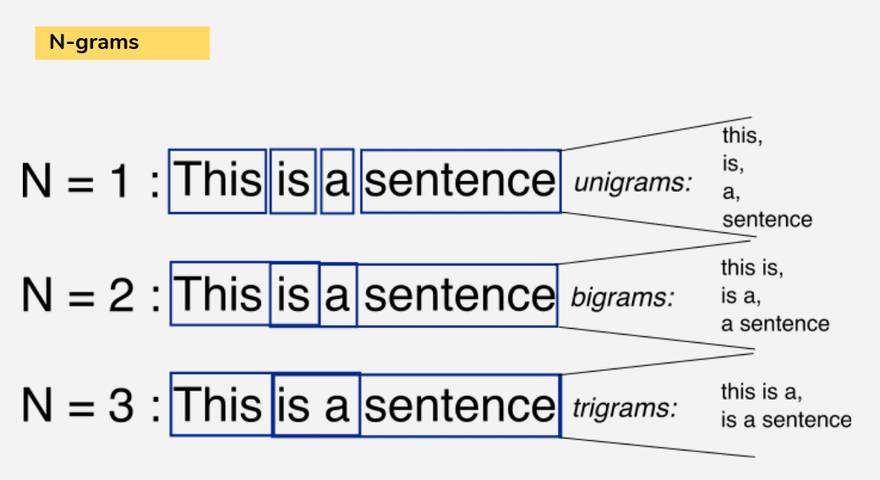

In [18]:
Image('images/ngrams.gif', width=500)

In [25]:
data = "All work and no play makes jack a dull boy, all work and no play"
tokens = word_tokenize(data.lower())
print(tokens)

['all', 'work', 'and', 'no', 'play', 'makes', 'jack', 'a', 'dull', 'boy', ',', 'all', 'work', 'and', 'no', 'play']


In [26]:
unigram = list(nltk.ngrams(tokens, 1))
bigram = list(nltk.ngrams(tokens, 2))
print(unigram[:5])
print(bigram[:5])

[('all',), ('work',), ('and',), ('no',), ('play',)]
[('all', 'work'), ('work', 'and'), ('and', 'no'), ('no', 'play'), ('play', 'makes')]


In [27]:
from nltk import FreqDist
print('Популярные униграммы: ', FreqDist(unigram).most_common(5))
print('Популярные биграммы: ', FreqDist(bigram).most_common(5))

Популярные униграммы:  [(('all',), 2), (('work',), 2), (('and',), 2), (('no',), 2), (('play',), 2)]
Популярные биграммы:  [(('all', 'work'), 2), (('work', 'and'), 2), (('and', 'no'), 2), (('no', 'play'), 2), (('play', 'makes'), 1)]


---------------

# 2. Перевод текста в числовой вектор
Представление текстового объекта в виде числового вектора

## 2.1 Bag of Words

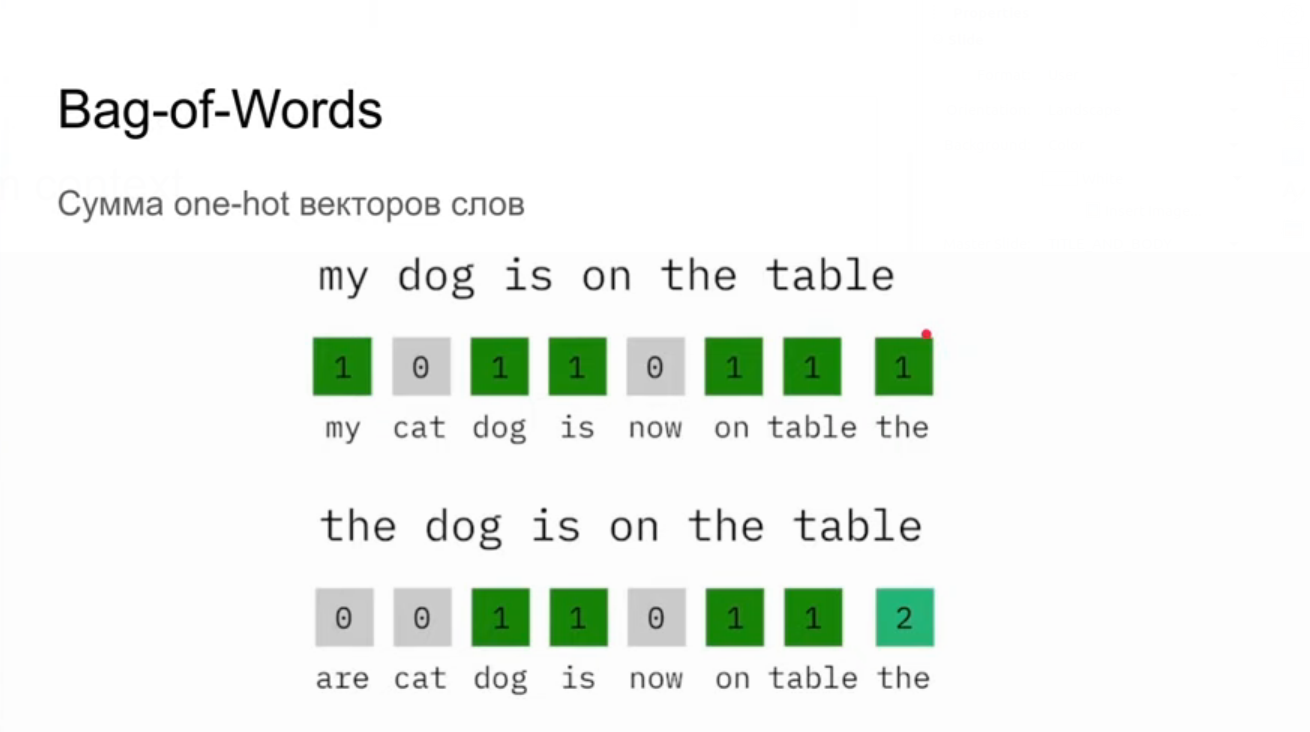

In [40]:
Image('images/bag_of_words.png', width=600)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

X = [' my cat is on the table now', 
     'the dog is on the table']

test = ['the dog the table', 
        'cat is on cat now']

cv = CountVectorizer()
vocab = cv.fit(X)

pd.DataFrame(data=cv.transform(test).toarray(),
             columns=vocab.get_feature_names())

,cat,dog,is,my,now,on,table,the
0,0,1,0,0,0,0,1,2
1,2,0,1,0,1,1,0,0


## 2.2 TF-IDF

$n_{\mathbb{d}\mathbb{w}}$ - частота вхождений слова $\mathbb{w}$ в документ $\mathbb{d}$;<br>
$N_{\mathbb{w}}$ - число документов, содержащих $\mathbb{w}$;<br>
$N$ - число документов; <br><br>

$p(\mathbb{w}, \mathbb{d}) = N_{\mathbb{w}} / N$ - вероятность наличия слова $\mathbb{w}$ в любом документе $\mathbb{d}$
<br>
$P(\mathbb{w}, \mathbb{d}, n_{\mathbb{d}\mathbb{w}}) = (N_{\mathbb{w}} / N)^{n_{\mathbb{d}\mathbb{w}}}$ - вероятность встретить $n_{\mathbb{d}\mathbb{w}}$ раз слово $\mathbb{w}$ в документе $\mathbb{d}$<br><br>

$-\log{P(\mathbb{w}, \mathbb{d}, n_{\mathbb{d}\mathbb{w}})} = n_{\mathbb{d}\mathbb{w}} \cdot \log{(N / N_{\mathbb{w}})} = TF(\mathbb{w}, \mathbb{d}) \cdot IDF(\mathbb{w})$<br><br>

$TF(\mathbb{w}, \mathbb{d}) = n_{\mathbb{d}\mathbb{w}}$ - term frequency;<br>
$IDF(\mathbb{w}) = \log{(N /N_{\mathbb{w}})}$ - inverted document frequency;

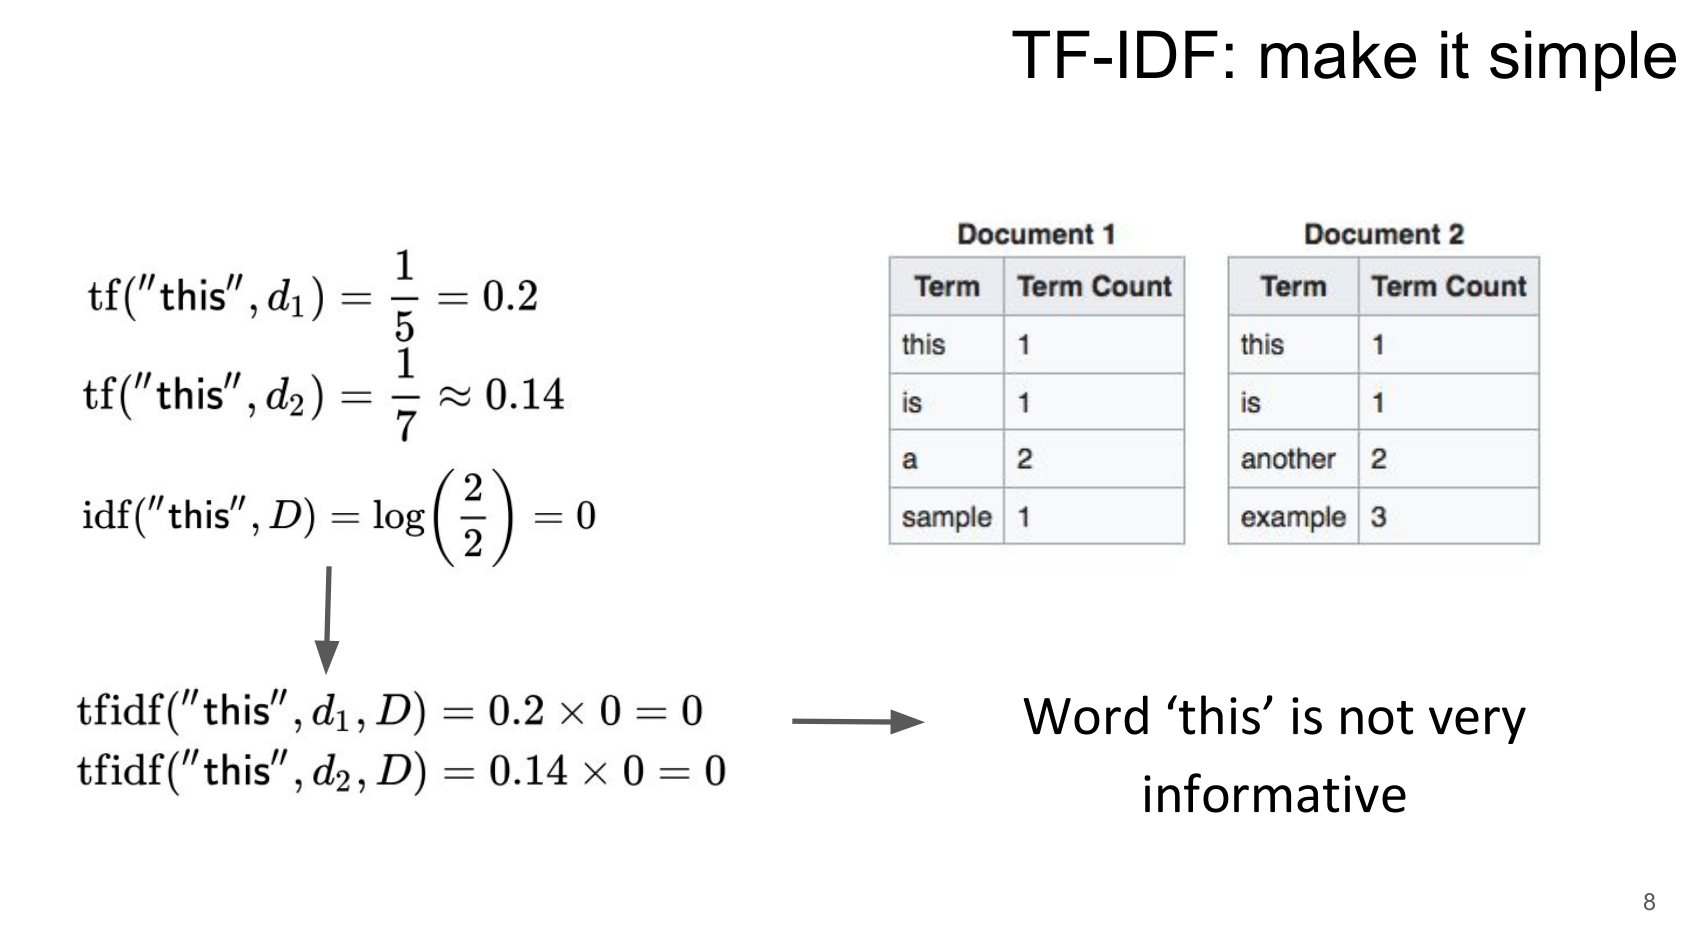

In [76]:
Image('images/tfidf_example.png', width=600)

In [3]:
import pandas as pd

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

X = ['cat is on', 
     'dog is on',
     'rat table on']

cv = TfidfVectorizer()
vocab = cv.fit(X)

pd.DataFrame(data=vocab.transform(X).toarray(),
             columns=vocab.get_feature_names())

,cat,dog,is,on,rat,table
0,0.720333,0.000000,0.547832,0.425441,0.000000,0.000000
1,0.000000,0.720333,0.547832,0.425441,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.385372,0.652491,0.652491


Можно его посчитать и для н-грамм и поставить разные ограничения

In [1]:
cv = TfidfVectorizer(min_df=0.3, ngram_range=(1, 2))
vocab = cv.fit(X)

pd.DataFrame(data=cv.transform(X).toarray(),
             columns=vocab.get_feature_names())

NameError: name 'TfidfVectorizer' is not defined

----

# 3. Embeddings 

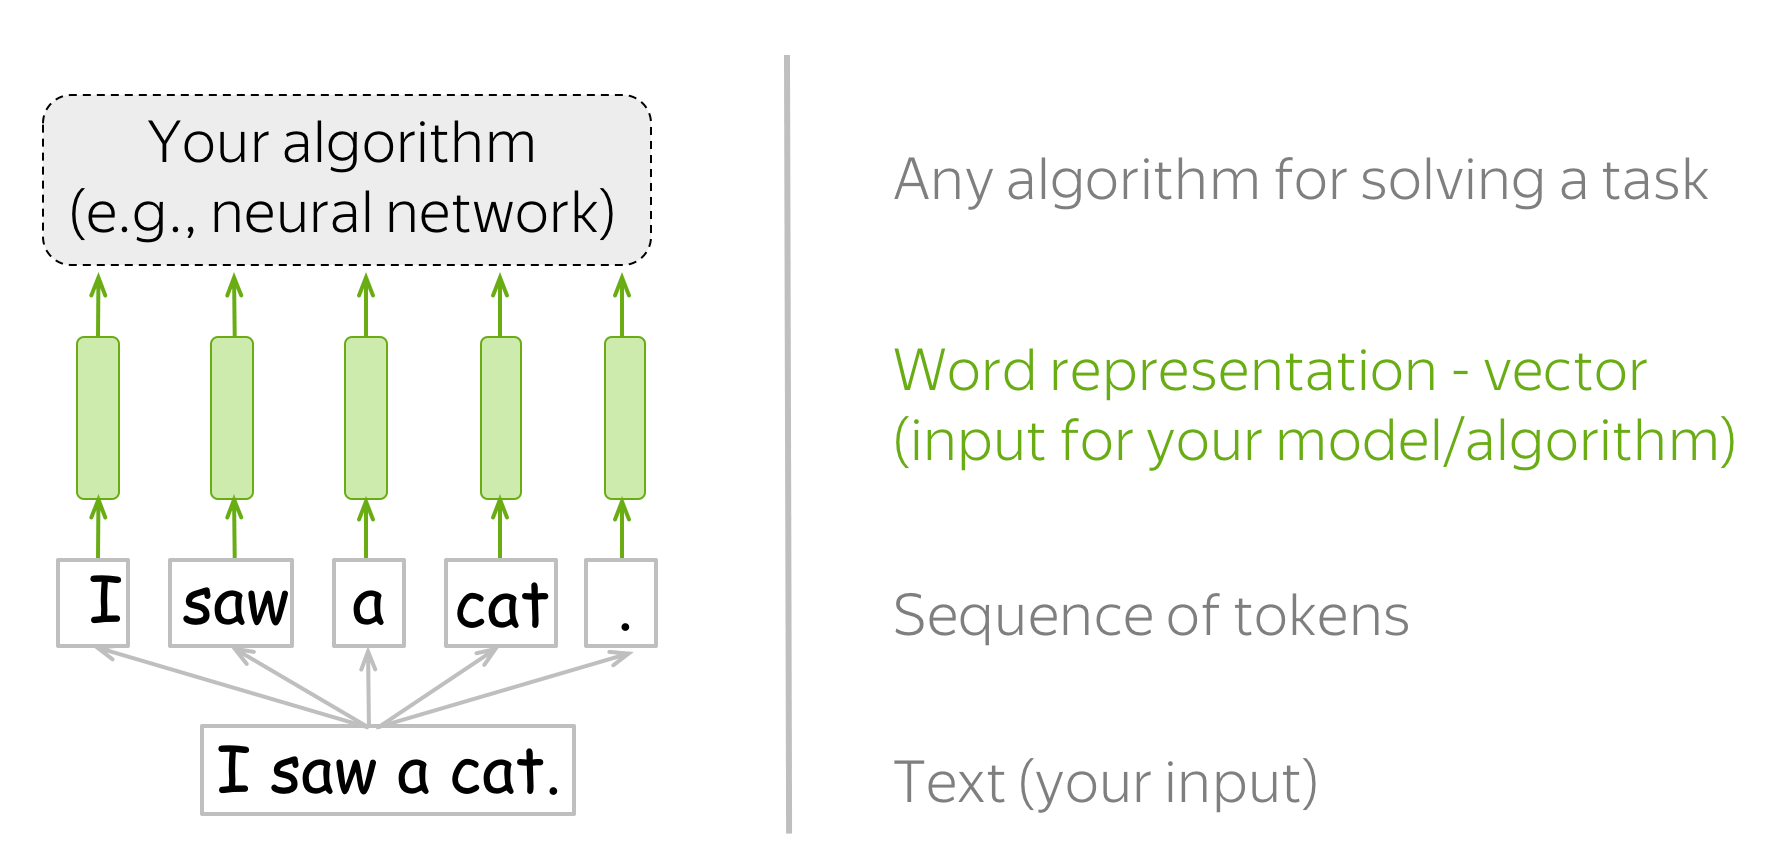

In [84]:
Image('images/word_repr_intro-min.png', width=600)

#### Каждый токен - вектор в некотором пространтсве. Наша задача - найти наилучшее пространтсво векторов.

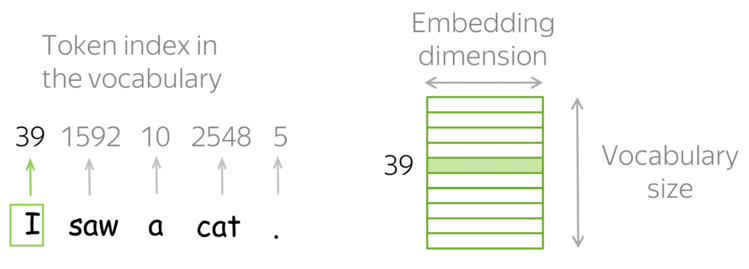

In [80]:
Image('images/lookup_table.gif', width=600)

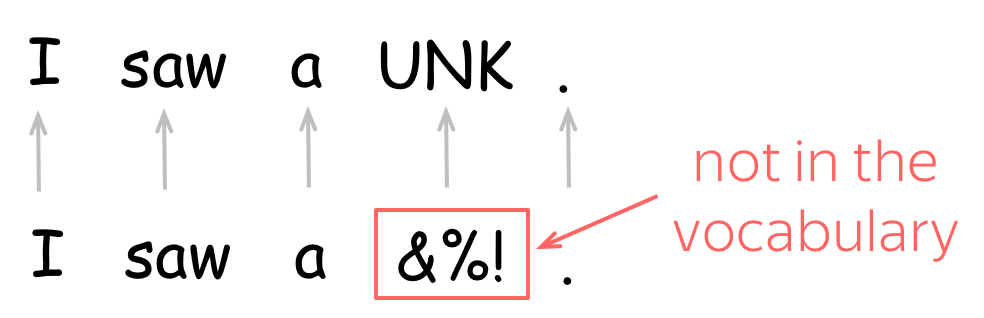

In [86]:
Image('images/unk_in_voc-min.png', width=600)

## Хотелка: чтобы векторное расстояние между похожими по смыслу словами было меньше, чем между не похожими. 



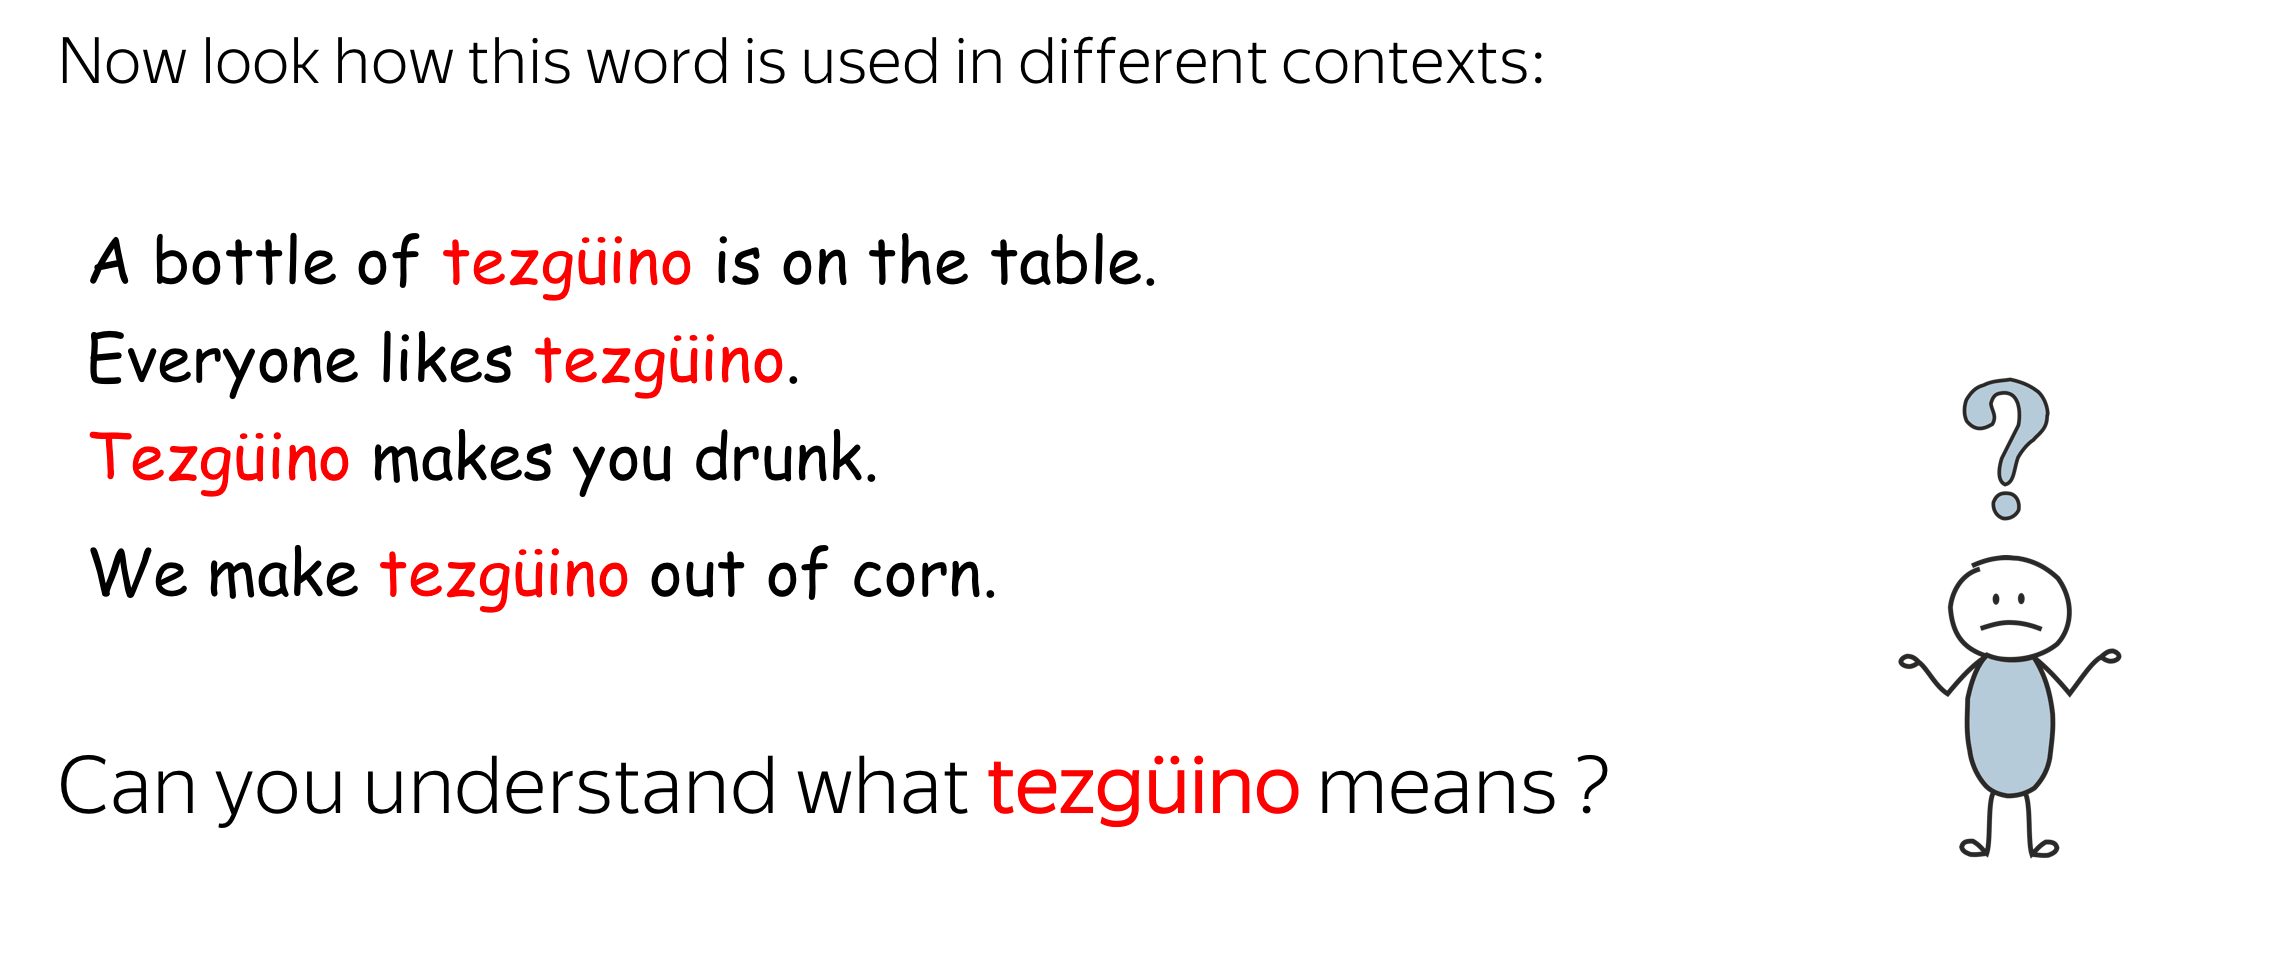

In [87]:
Image('images/tezguino2-min.png', width=600)

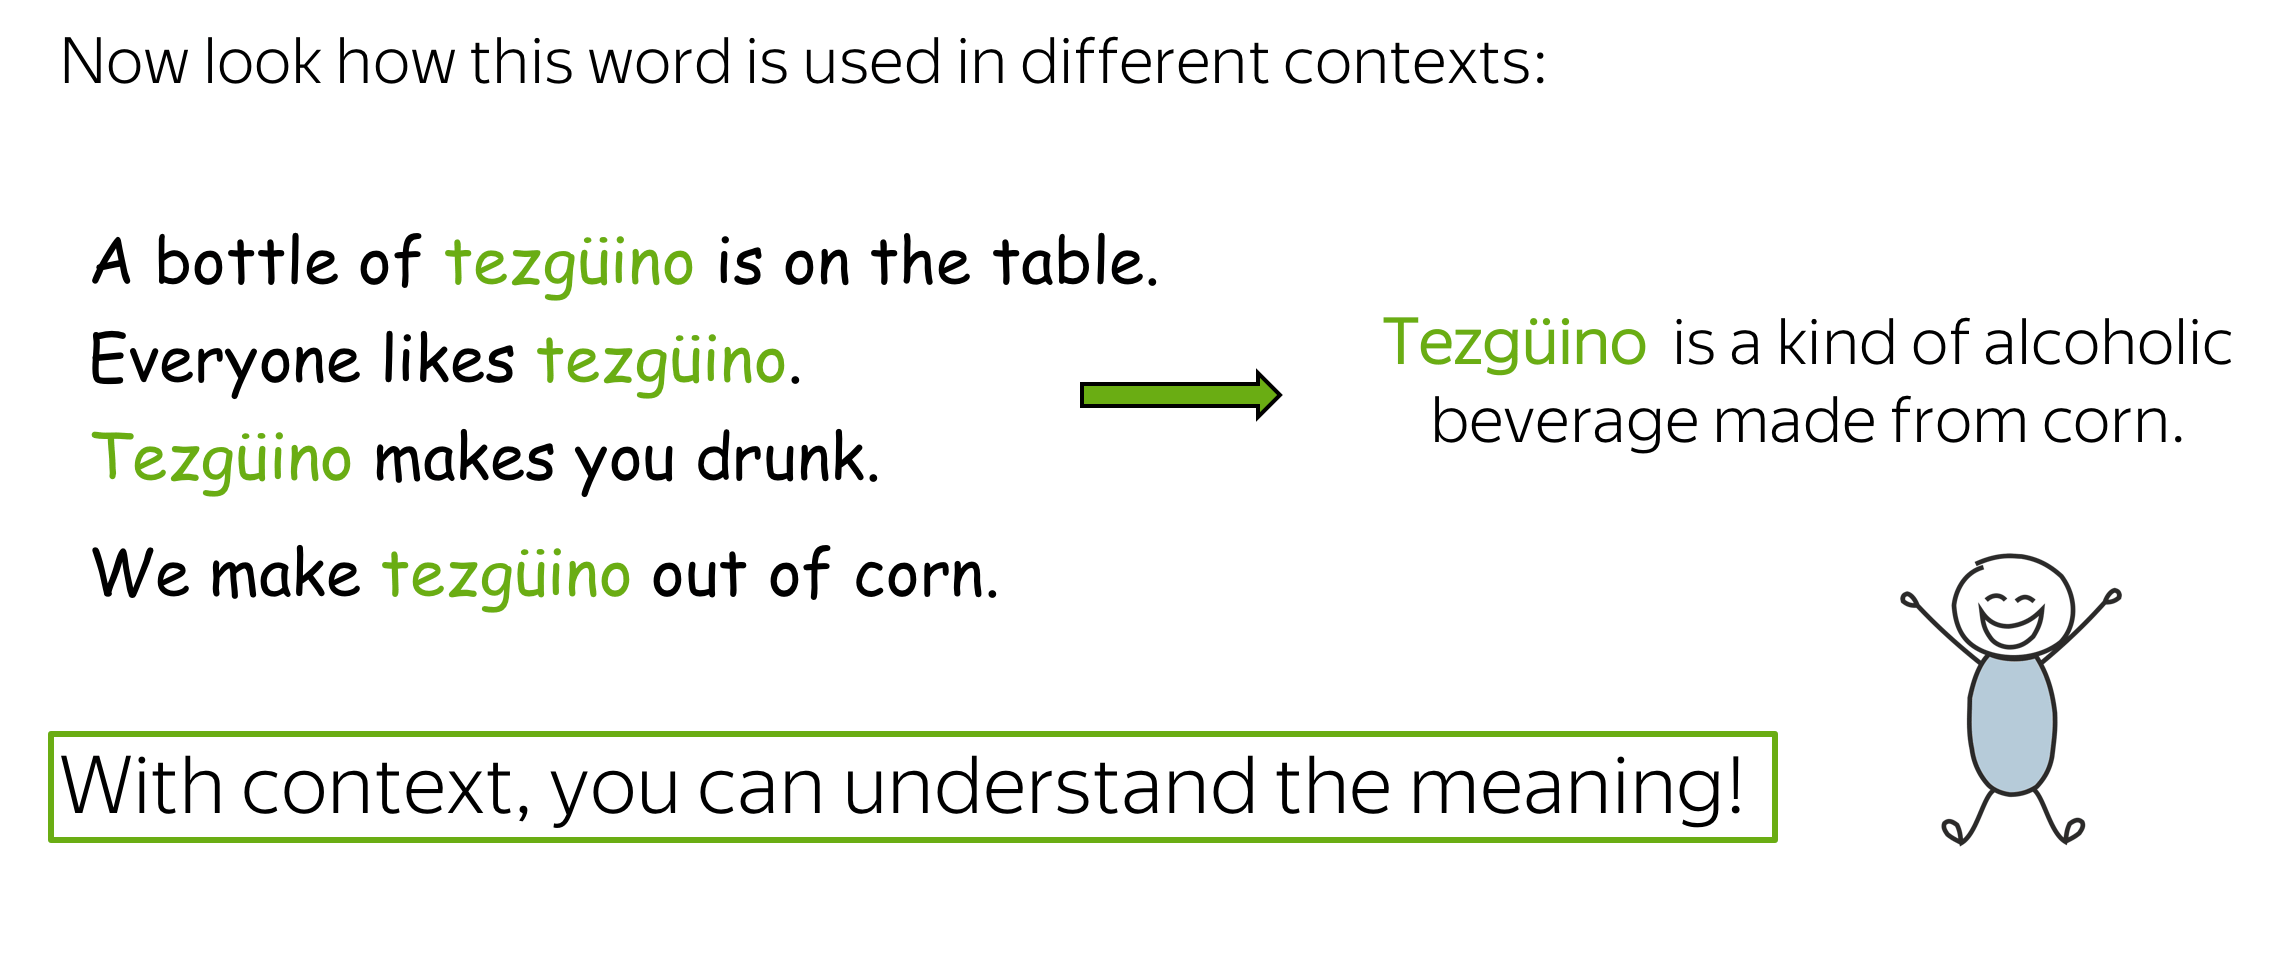

In [88]:
Image('images/tezguino3-min.png', width=600)

## 3.1 Co-occurrence counts

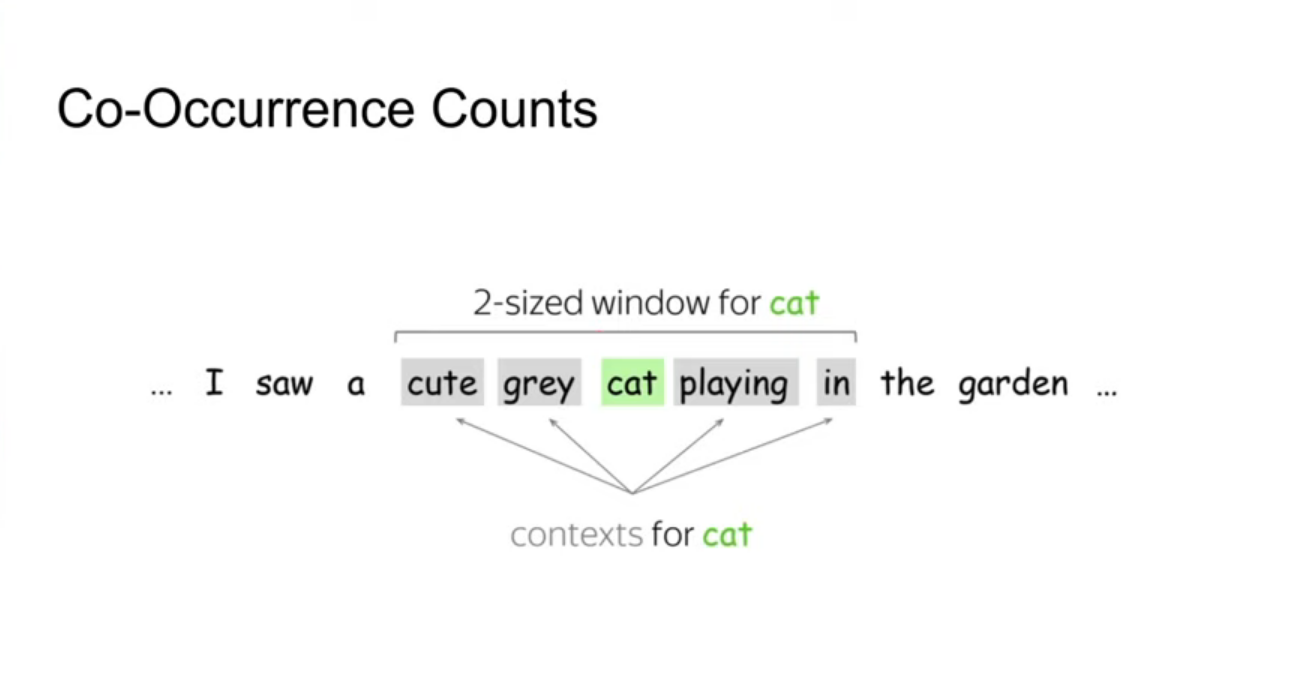

In [4]:
Image('images/co-occurence.png', width=600)

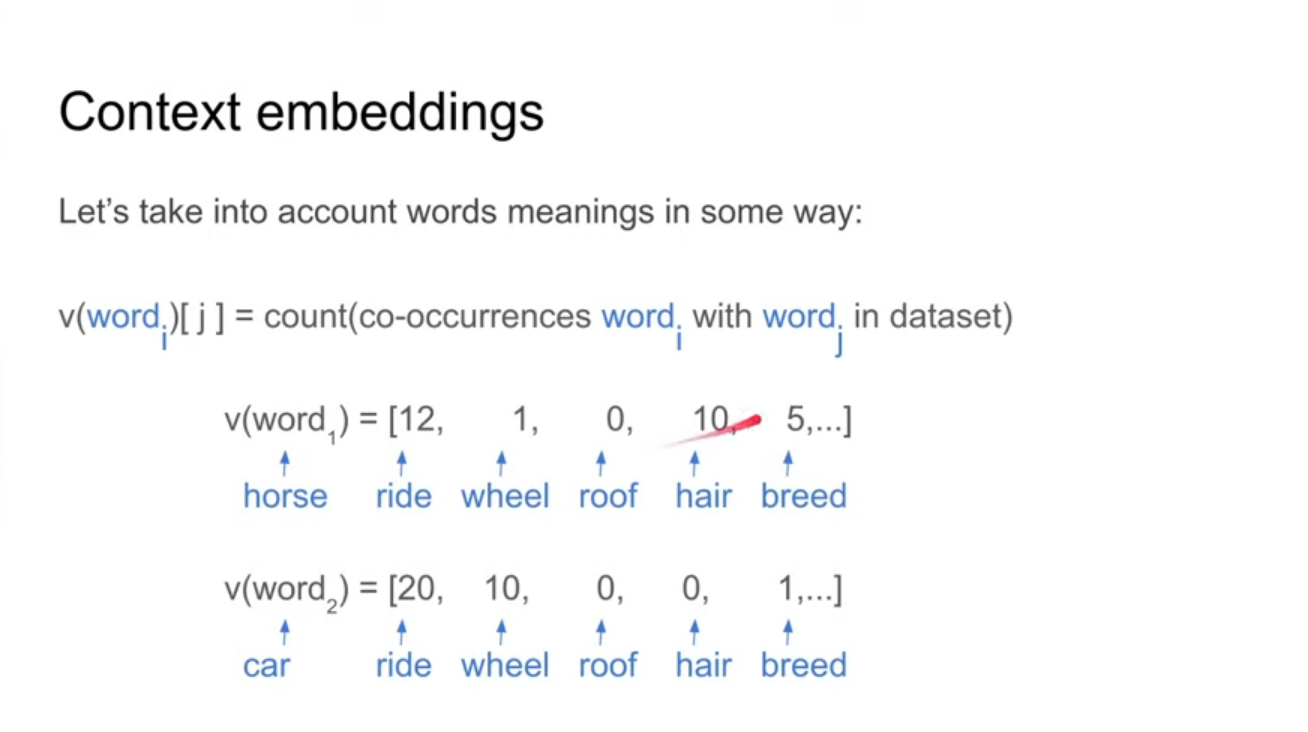

In [3]:
Image('images/context_embeddings.png', width=600)

Сделаем co-occurence для примера. У нас есть 3 предложения и окно длины 3 (одно слово до, по центру и после) 

In [31]:
X = ['I enjoy flying',
     'I like trains ',
     'I like taxi']

coocc = pd.DataFrame(
             index   = ['I', 'enjoy', 'like', 'flying', 'trains', 'taxi'],
             columns = ['I', 'enjoy', 'like', 'flying', 'trains', 'taxi'],
             data = np.array([[0, 1, 2, 0, 0, 0],
                              [1, 0, 0, 1, 0, 0],
                              [2, 0, 0, 0, 1, 1],
                              [0, 1, 0, 0, 0, 0],
                              [0, 0, 1, 0, 0, 0],
                              [0, 0, 1, 0, 0, 0]]))

In [6]:
coocc

,I,enjoy,like,flying,trains,taxi
I,0,1,2,0,0,0
enjoy,1,0,0,1,0,0
like,2,0,0,0,1,1
flying,0,1,0,0,0,0
trains,0,0,1,0,0,0
taxi,0,0,1,0,0,0


Слова с идентичными контекстами имеют одинаковые вектора.

Однако понятно, что при очень большом словаре, мы получим матрицу гигантских размеров, которую неудобно хранить. Поэтому воспользуемся SVD разложением, чтобы уменьшить размер словаря.

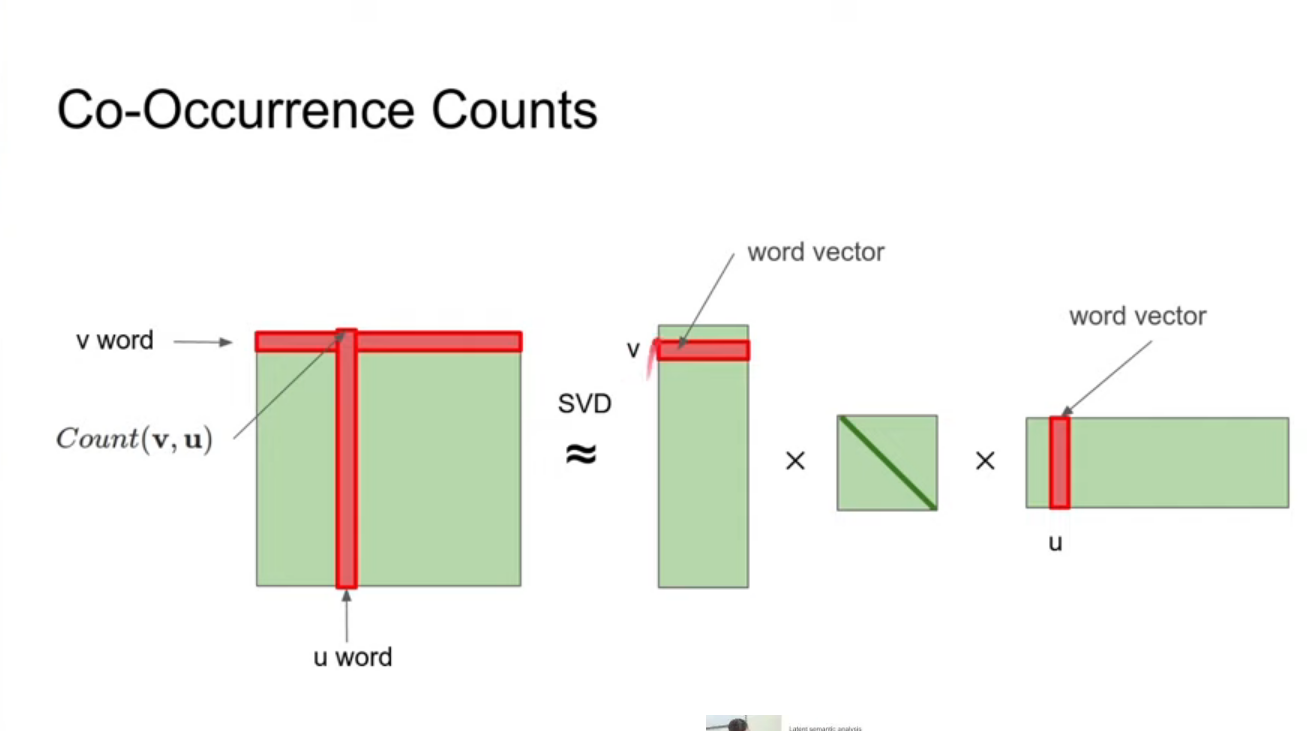

In [9]:
Image('images/SVD.png', width=600)

In [117]:
u, s, vh = np.linalg.svd(coocc)

In [116]:
s

array([2.61312593e+00, 2.61312593e+00, 1.08239220e+00, 1.08239220e+00,
       3.80996118e-17, 1.02643089e-33])

In [33]:
U = np.round(u,3)[:,:3]
S = np.eye(3) * s[:3]
VT = np.round(vh,3)[:3,:]

In [35]:
U

array([[ 0.854,  0.   , -0.146],
       [-0.   , -0.383,  0.   ],
       [ 0.   , -0.924, -0.   ],
       [ 0.146,  0.   , -0.854],
       [ 0.354,  0.   ,  0.354],
       [ 0.354,  0.   ,  0.354]])

In [34]:
np.round(U.dot(S).dot(VT), 1)

array([[ 0. ,  1. ,  2. ,  0. ,  0. ,  0. ],
       [ 0.9,  0. ,  0. ,  0.1,  0.4,  0.4],
       [ 2.1,  0. ,  0. ,  0.4,  0.9,  0.9],
       [ 0. ,  1. , -0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ,  0. ,  0. ,  0. ]])

Заметим, что у схожих векторов и после сокращения размерностей вектора похожи.

In [36]:
from scipy.spatial.distance import cosine

In [37]:
# между глаголами enjoy и like
cosine(np.array([-0.   , -0.383, -0.   ]),
       np.array([ 0.   , -0.924,  0.   ]))

0.0

In [38]:
# между flying и trains
cosine([ 0.146,  0.   , -0.854],
       [ 0.354,  0.   ,  0.354])

1.5778361689253098

In [39]:
# между taxi and trains
cosine([ 0.354,  0.   ,  0.354],
       [ 0.354,  0.   ,  0.354])

0.0

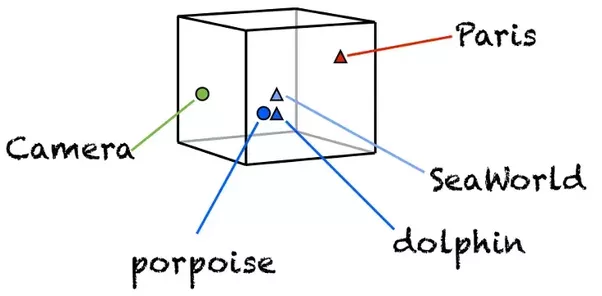

In [58]:
Image('images/embspace.png')

### Кстати, можно сделать вот так

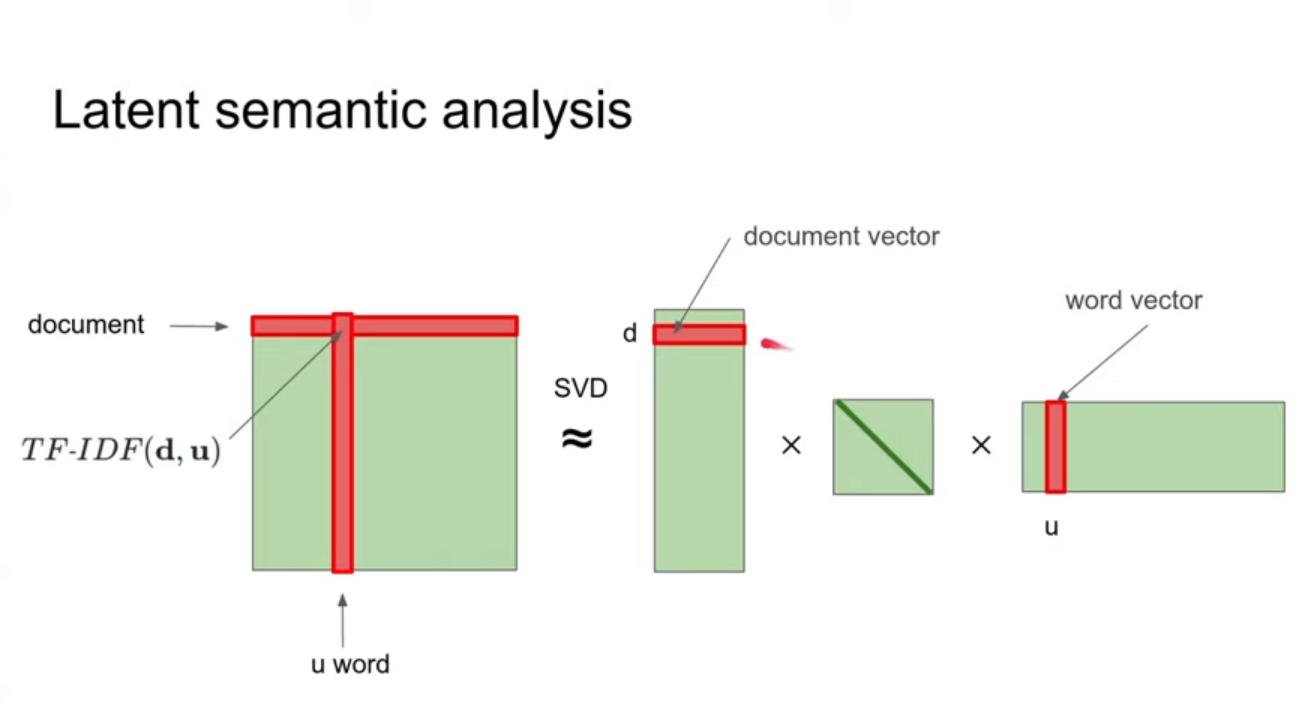

In [86]:
Image('images/tfidfsvd.png', width=600)

## 3.2 Word2Vec (обобщение контекстных эмбеддингов)

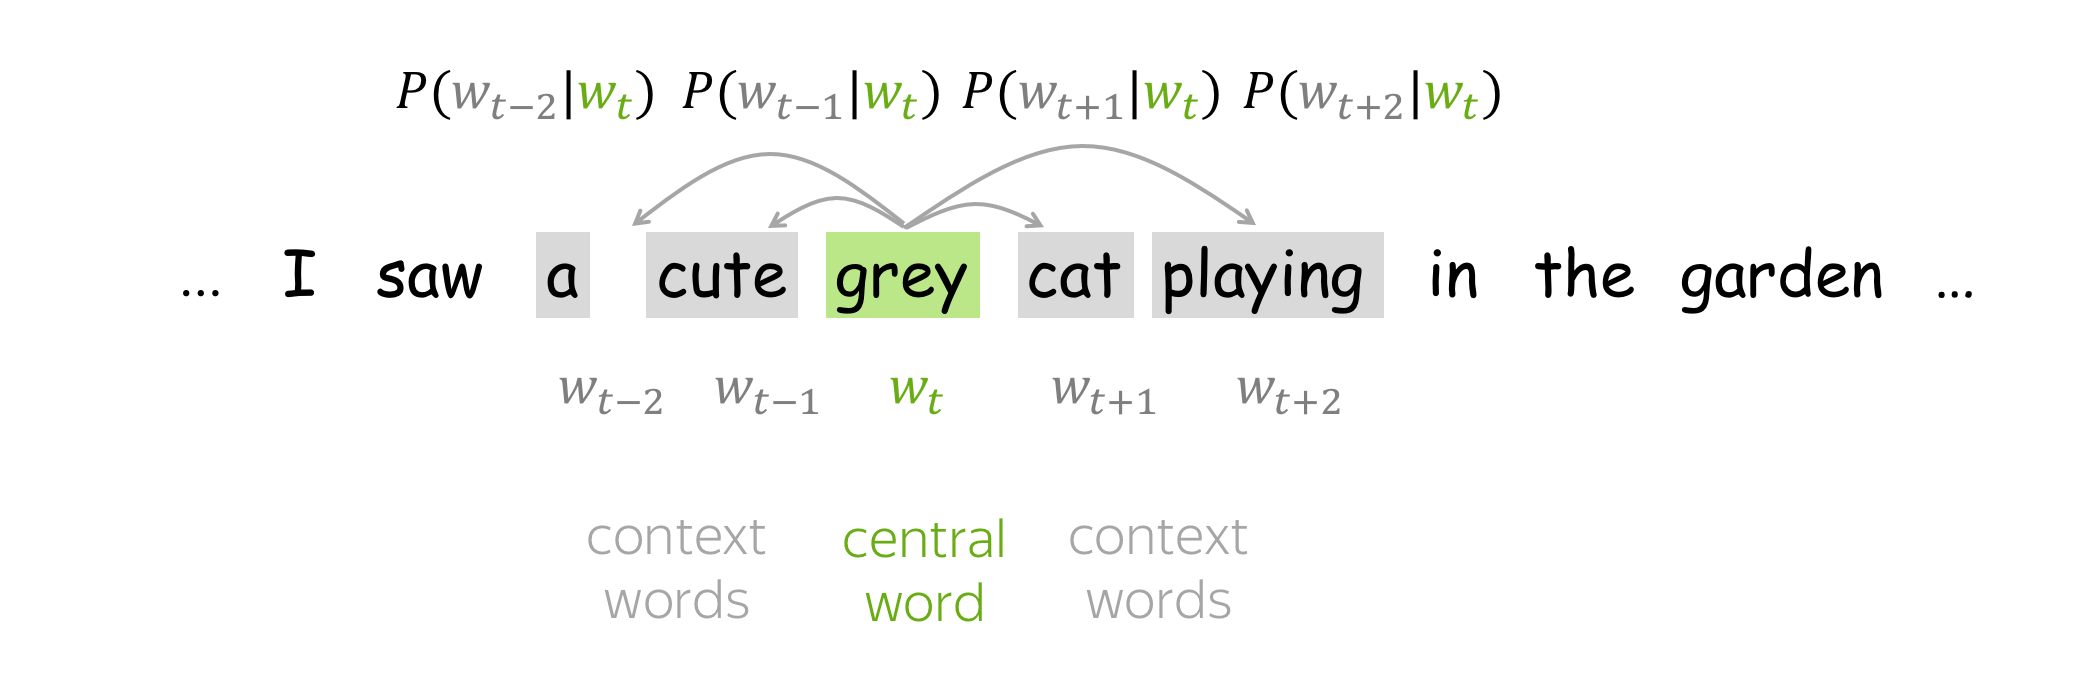

In [17]:
Image('images/window_prob3-min.png', width=600)

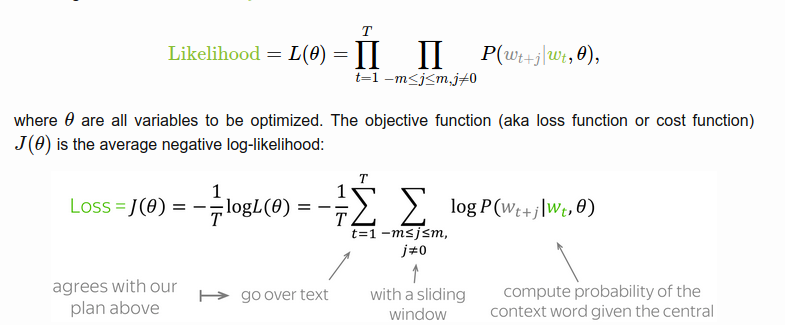

In [18]:
Image('images/WVLoss.png', width=600)

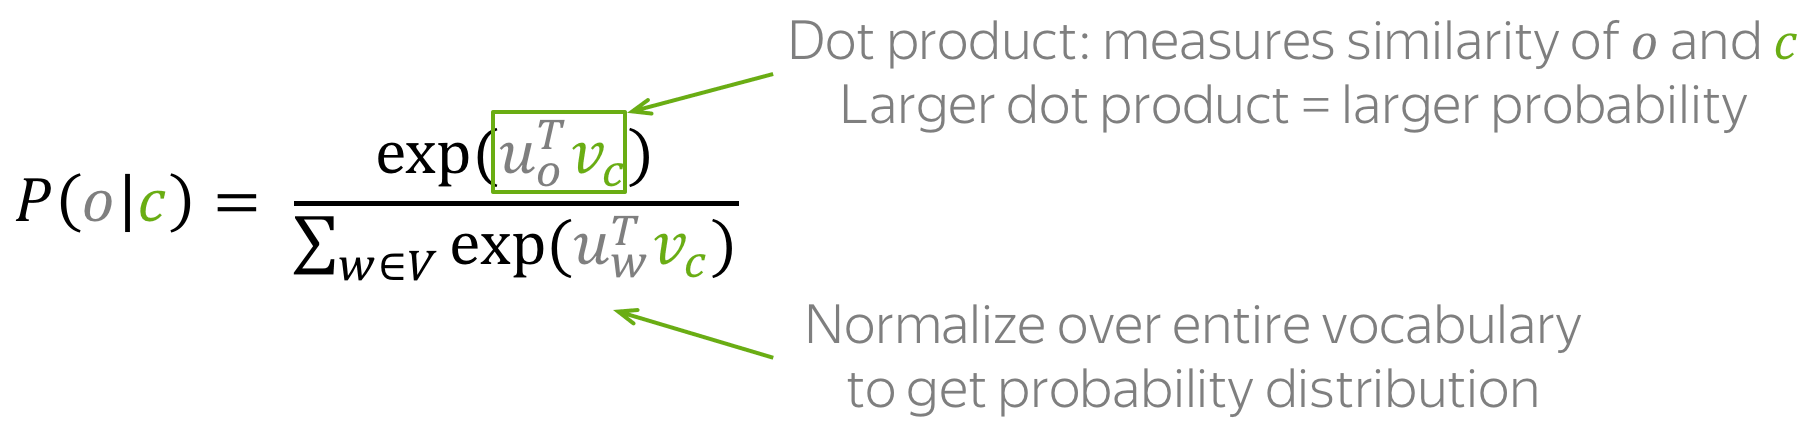

In [21]:
Image('images/prob_o_c-min.png', width=400)

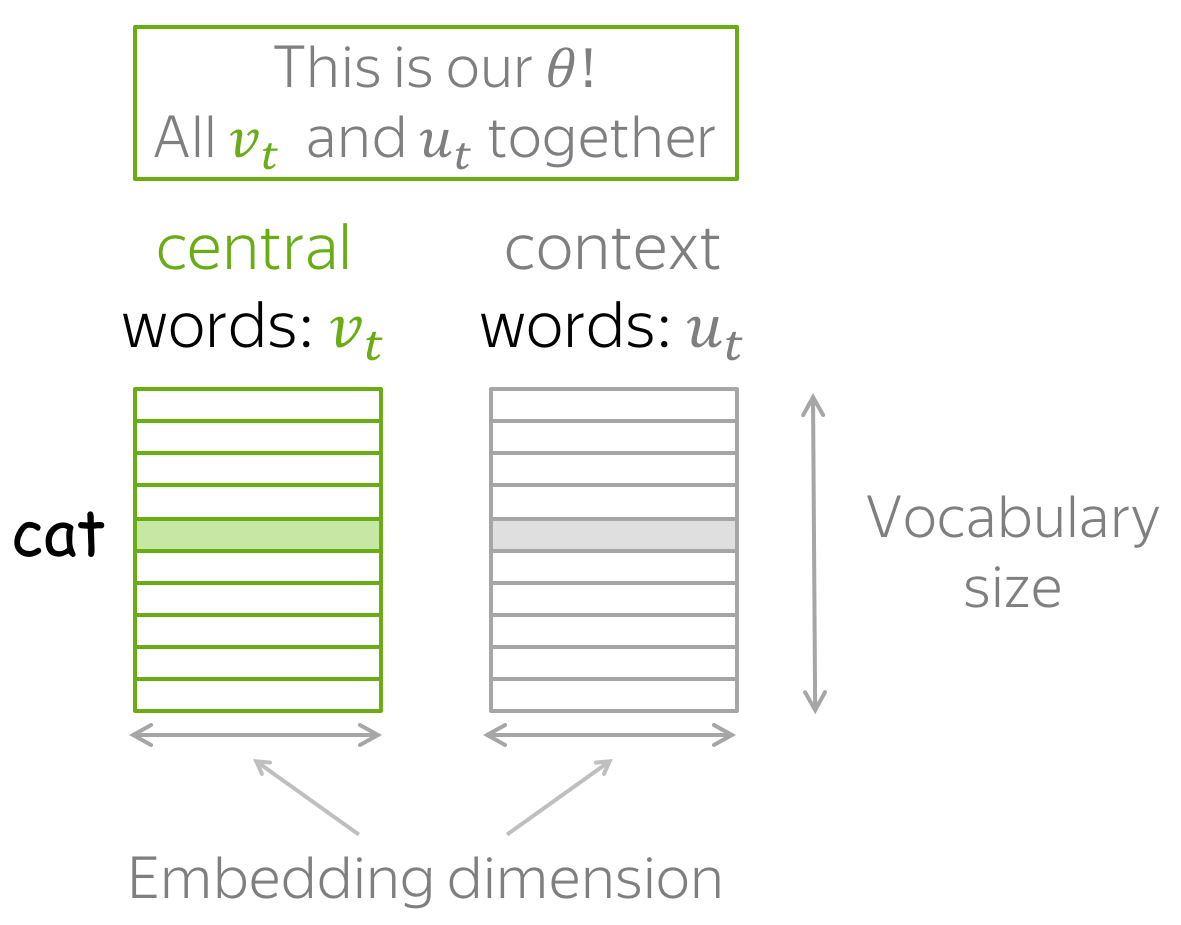

In [20]:
Image('images/two_vocs_with_theta-min.png', width=400)

Основная идея понятна, глубже спускаться не будем))

### Пример обучения word2vec

In [5]:
# токенизация
from nltk.tokenize import WordPunctTokenizer
data = list(open("data/quora.txt", encoding="utf-8")) # список вопросов с quora
tokenizer = WordPunctTokenizer()
data_tok = [tokenizer.tokenize(s.lower()) for s in data]
data_tok[4]

['why',
 'was',
 'george',
 'rr',
 'martin',
 'critical',
 'of',
 'jk',
 'rowling',
 'after',
 'losing',
 'the',
 'hugo',
 'award',
 '?']

In [8]:
len(data_tok[:100000])

100000

In [9]:
# !pip install gensim
from gensim.models import Word2Vec

model = Word2Vec(data_tok[:100000], 
                 vector_size=3,      # embedding vector size
                 min_count=5,  # consider words that occured at least 5 times
                 window=5).wv  # define context as a 5-word window around the target word

In [10]:
model.get_vector('king')

array([1.311231  , 0.03949137, 2.3163183 ], dtype=float32)

In [12]:
model.most_similar('king')

[('finds', 0.9999254941940308),
 ('laden', 0.9998717904090881),
 ('statement', 0.9998224973678589),
 ('southeast', 0.99980628490448),
 ('mainly', 0.9997268319129944),
 ('alan', 0.9997124075889587),
 ('vascular', 0.9996718764305115),
 ('democracy', 0.9996507167816162),
 ('zen', 0.9996405839920044),
 ('aware', 0.9996220469474792)]

In [47]:
from scipy.spatial.distance import cosine

cosine(model.get_vector('king'), model.get_vector('prince'))

0.04224741458892822

In [48]:
cosine(model.get_vector('king'), model.get_vector('queen'))

0.06273120641708374

In [49]:
cosine(model.get_vector('king'), model.get_vector('bread'))

0.9255061820149422

### Большой предобученный Word2Vec

In [50]:
import gensim.downloader as api
model_wiki = api.load("glove-twitter-100") # предобученная модель на твитах

[==================================================] 100.0% 387.1/387.1MB downloaded


Можно делать так

In [128]:
model_wiki.get_vector('king')

array([-3.7500e-01, -2.7532e-01,  1.2489e-01, -9.2143e-02, -4.3104e-01,
        2.5268e-02, -4.1867e-02,  1.2848e-01, -7.9363e-02, -1.0011e-01,
        1.4076e-01,  1.0922e-01, -3.4546e+00, -6.9851e-01,  6.6580e-01,
        5.1494e-01,  4.5912e-01, -2.1957e-01,  4.4094e-01, -3.0631e-01,
        1.2293e-01, -9.9830e-02, -2.5755e-01, -6.1872e-01,  1.0613e+00,
       -9.4278e-01,  1.9284e-01, -8.2089e-02,  2.7782e-01, -1.8595e-01,
        2.9140e-02, -3.0870e-01, -3.9870e-01, -4.3038e-01,  3.8403e-01,
        3.3243e-01, -1.4446e-01,  1.6682e-01,  4.2301e-01, -2.6490e-01,
       -7.8106e-02, -4.6756e-01, -3.4039e-01, -1.3690e-01,  7.0890e-01,
       -4.8015e-01,  8.9183e-02, -2.3709e-01,  7.5124e-01,  2.0507e-01,
       -5.5263e-01, -3.8105e-01, -7.7082e-02,  3.6118e-01, -8.9840e-01,
       -5.3537e-01,  3.3161e-01, -1.3460e-01, -5.7742e-02,  1.9428e-01,
        1.8008e-01, -4.0697e-01,  2.6654e-03, -7.8771e-02, -2.3616e-01,
       -9.8115e-01, -1.6823e-01,  1.1459e-01, -2.7011e-01, -2.14

In [138]:
model_wiki.most_similar('muse')

[('coldplay', 0.8080717921257019),
 ('paramore', 0.7668760418891907),
 ('metallica', 0.7606366276741028),
 ('oasis', 0.7555792927742004),
 ('linkin', 0.7516505122184753),
 ('beatles', 0.7458093762397766),
 ('nirvana', 0.7320069670677185),
 ('aerosmith', 0.7288546562194824),
 ('maroon', 0.7187883853912354),
 ('radiohead', 0.7150726318359375)]

А можно вот так

In [131]:
model_wiki.most_similar(positive=["obama", "woman"], negative=['man'])

[('romney', 0.734304666519165),
 ('barack', 0.7330079078674316),
 ('clinton', 0.7241668701171875),
 ('potus', 0.6990386247634888),
 ('hillary', 0.68641597032547),
 ('president', 0.6800453066825867),
 ('republican', 0.6769098043441772),
 ('biden', 0.6721881031990051),
 ('republicans', 0.6508957743644714),
 ('government', 0.6416749358177185)]

In [132]:
model_wiki.most_similar(positive=["kings", "queen"], negative=['king'])

[('queens', 0.7145572900772095),
 ('royals', 0.7088159918785095),
 ('angels', 0.6431241631507874),
 ('dragons', 0.6302518248558044),
 ('stars', 0.6201760768890381),
 ('dolls', 0.6191067695617676),
 ('devils', 0.6049659252166748),
 ('union', 0.6024104952812195),
 ('melbourne', 0.5877556204795837),
 ('wizards', 0.5810402631759644)]

In [133]:
model_wiki.most_similar(positive=["coder", "money"], negative=["brain"])

[('broker', 0.5820155739784241),
 ('bonuses', 0.5424473285675049),
 ('banker', 0.5385112762451172),
 ('designer', 0.5197198390960693),
 ('merchandising', 0.4964233338832855),
 ('treet', 0.49220192432403564),
 ('shopper', 0.4920561909675598),
 ('part-time', 0.4912828207015991),
 ('freelance', 0.4843311905860901),
 ('aupair', 0.47964534163475037)]

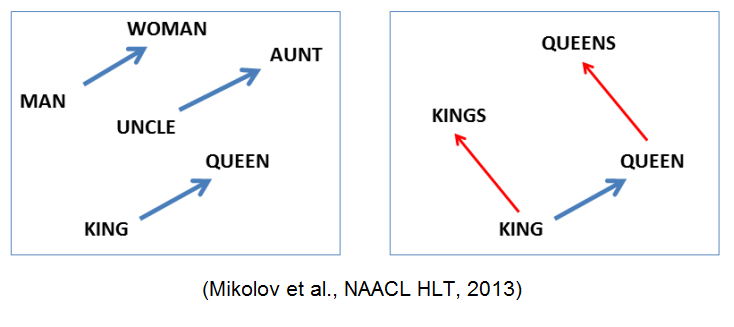

In [57]:
Image('images/analogies.png', width=600)

### Порисуем немного

Просто собираем набор слов

In [134]:
# соберем некоторый набор слов
from collections import Counter
from itertools import chain

pop_words = Counter(chain(*data_tok))
some_words = [word for word, count in pop_words.most_common(1000) if len(word) > 2 and not word.isdigit()] 

word_vectors = np.array([model_wiki.get_vector(word) for word in some_words])

Код рисовалки

In [135]:
import bokeh.models as bm, bokeh.plotting as pl
from bokeh.io import output_notebook
output_notebook()

def draw_vectors(x, y, radius=10, alpha=0.25, color='blue',
                 width=600, height=400, show=True, **kwargs):
    """ draws an interactive plot for data points with auxilirary info on hover """
    if isinstance(color, str): color = [color] * len(x)
    data_source = bm.ColumnDataSource({ 'x' : x, 'y' : y, 'color': color, **kwargs })

    fig = pl.figure(active_scroll='wheel_zoom', width=width, height=height)
    fig.scatter('x', 'y', size=radius, color='color', alpha=alpha, source=data_source)

    fig.add_tools(bm.HoverTool(tooltips=[(key, "@" + key) for key in kwargs.keys()]))
    if show: pl.show(fig)
    return fig

Loading BokehJS ...

### SVD

In [64]:
from sklearn.decomposition import PCA

# map word vectors onto 2d plane with PCA. Use good old sklearn api (fit, transform)
# after that, normalize vectors to make sure they have zero mean and unit variance
word_vectors_pca = PCA(n_components=2).fit_transform(word_vectors)

# and maybe MORE OF YOUR CODE here :)

word_vectors_pca = (word_vectors_pca - word_vectors_pca.mean(0)) / (word_vectors_pca.std(0))

In [67]:
len(words)

5

In [69]:
draw_vectors(word_vectors_pca[:, 0], word_vectors_pca[:, 1], token=some_words)

Figure(id='1100', ...)

Сожмем вектора в 2-мерную проекцию. Можно через SVD, но мы воспользуемся более крутым способом __[TSNE](https://distill.pub/2016/misread-tsne/)__.

### TSNE

In [61]:
from sklearn.manifold import TSNE

word_tsne = TSNE(verbose=100).fit_transform(word_vectors)
word_tsne = (word_tsne - word_tsne.mean(0)) / word_tsne.std(0)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 897 samples in 0.005s...
[t-SNE] Computed neighbors for 897 samples in 0.136s...
[t-SNE] Computed conditional probabilities for sample 897 / 897
[t-SNE] Mean sigma: 1.583468
[t-SNE] Computed conditional probabilities in 0.026s
[t-SNE] Iteration 50: error = 74.4433823, gradient norm = 0.3428931 (50 iterations in 4.051s)
[t-SNE] Iteration 100: error = 76.8960419, gradient norm = 0.3169332 (50 iterations in 4.333s)
[t-SNE] Iteration 150: error = 77.8792038, gradient norm = 0.3121718 (50 iterations in 4.615s)
[t-SNE] Iteration 200: error = 77.6254196, gradient norm = 0.3046861 (50 iterations in 4.725s)
[t-SNE] Iteration 250: error = 79.0504608, gradient norm = 0.3035835 (50 iterations in 4.795s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.050461
[t-SNE] Iteration 300: error = 1.7905624, gradient norm = 0.0041154 (50 iterations in 3.816s)
[t-SNE] Iteration 350: error = 1.6822450, gradient norm = 0.0007189 (

In [136]:
draw_vectors(word_tsne[:, 0], word_tsne[:, 1], token=some_words)

Figure(id='1446', ...)

## 3.3 Embeddings in Neural Nets

In [78]:
from torch import nn, optim
import torch

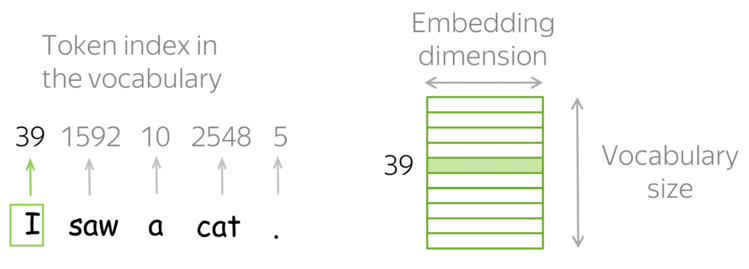

In [75]:
Image('images/lookup_table.gif', width=600)

Обучаем эмбеддинги вместе с оптимизацией нейронной сети

In [83]:
# an Embedding module containing 10 tensors of size 3
embedding = nn.Embedding(num_embeddings=10, 
                         embedding_dim = 3)

# a batch of 2 samples of 4 indices each
input = torch.LongTensor([[1, 2, 4, 5],[4, 3, 2, 9]]) # всего 10 токенов
embedding(input)

tensor([[[ 0.8310,  0.8753,  0.2929],
         [-0.7368,  0.5580, -1.3440],
         [ 0.4746,  1.7940,  0.8070],
         [ 0.3046, -0.5440,  1.0887]],

        [[ 0.4746,  1.7940,  0.8070],
         [ 0.7865,  1.0788,  1.5260],
         [-0.7368,  0.5580, -1.3440],
         [-0.9518, -0.2298, -1.6292]]], grad_fn=<EmbeddingBackward>)

In [137]:
 # FloatTensor containing pretrained weights
weight = torch.FloatTensor([[1, 2.3, 3], 
                            [4, 5.1, 6.3]])
embedding = nn.Embedding.from_pretrained(weight)
# Get embeddings for index 1
input = torch.LongTensor([1])
embedding(input)

tensor([[4.0000, 5.1000, 6.3000]])

# Ссылки на источники
* [Лекция Deep Learning School](https://www.youtube.com/watch?v=d0oV1MZ_KdE&list=PL0Ks75aof3Ti1GDgeePUkCJWn02c0VDA5&index=1)
* [Сравнение PyMorphy2 и PyMystem3](https://habr.com/ru/post/503420/)
* [Курс Шада](https://github.com/yandexdataschool/nlp_course)
* [Лена Войта Эмбеддинги](https://lena-voita.github.io/nlp_course/word_embeddings.html)
* [Крутая либа для сегментации текста Razdel](https://natasha.github.io/razdel/)
* [Хабр эмбеддинги](https://habr.com/ru/company/ods/blog/329410/)
* [Co-occurrence](https://medium.com/@apargarg99/co-occurrence-matrix-singular-value-decomposition-svd-31b3d3deb305)